In [45]:
import pandas as pd
import numpy as np
import googletrans
import goslate
from googletrans import Translator

In [46]:
data_reviews= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_reviews_dataset.csv.zip')


In [47]:
data_orders= pd.read_csv('/Users/fabiobisognin/Desktop/olist_orders_dataset.csv.zip')

In [48]:
data_customer= pd.read_csv('/Users/fabiobisognin/Desktop/olist_customers_dataset.csv.zip')

## JUNTO LAS TRES BASES DE DATOS (REVIEWS, CUSTOMER, ORDER)


In [49]:

data_incomplete=pd.merge(data_reviews, data_orders, on='order_id', how='outer')
data=pd.merge(data_incomplete, data_customer, on='customer_id', how='outer')

In [50]:
data.shape

(100000, 18)

In [51]:
data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC


In [52]:
data['review_comment_message']=data.review_comment_message.astype('str')
data.review_comment_message=data.review_comment_message.replace(np.nan, 'o')
print(data.review_comment_message.isnull().sum())

0


# SENTIMENT ANALYSIS

In [53]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk

from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [54]:
score_data= data[['review_score', 'review_comment_message']]
score_data['review_score'] = score_data['review_score'].astype(str)

<ipython-input-54-6f30d685543b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['review_score'] = score_data['review_score'].astype(str)


In [55]:
score_data

,review_score,review_comment_message
0,4,nan
1,5,nan
2,5,nan
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99995,5,nan
99996,5,"Excelente mochila, entrega super rápida. Super..."
99997,4,nan
99998,1,Solicitei a compra de uma capa de retrovisor c...


CLEAN ACCENT AND ELIMINATE UPPERS 

In [56]:
score_data['review_comment_message'] = score_data['review_comment_message'].str.replace(r'[^\w\s]+', '')

<ipython-input-56-b19d236ecb85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data['review_comment_message'] = score_data['review_comment_message'].str.replace(r'[^\w\s]+', '')


In [95]:
score_data['review_comment_message'] = score_data['review_comment_message'].str.lower()

In [96]:

score_data['review_score']=score_data['review_score'].str.replace('5', 'Positive')
score_data['review_score']=score_data['review_score'].str.replace('4', 'Positive')
score_data['review_score']=score_data['review_score'].str.replace('3', 'Neutral')
score_data['review_score']=score_data['review_score'].str.replace('2', 'Negative')
score_data['review_score']=score_data['review_score'].str.replace('1', 'Negative')



In [97]:
score_data
score_data = score_data[score_data['review_comment_message'].notna()]

In [98]:
score_data

,review_score,review_comment_message,review
0,Positive,nan,4
1,Positive,nan,5
2,Positive,nan,5
3,Positive,recebi bem antes do prazo estipulado,5
4,Positive,parabéns lojas lannister adorei comprar pela i...,5
...,...,...,...
99995,Positive,nan,5
99996,Positive,excelente mochila entrega super rápida super r...,5
99997,Positive,nan,4
99998,Negative,solicitei a compra de uma capa de retrovisor c...,Negative


In [99]:
train_pos = score_data[score_data['review_score'] == 'Positive']
train_neg = score_data[score_data['review_score'] == 'Negative']

In [100]:
train_pos

,review_score,review_comment_message,review
0,Positive,nan,4
1,Positive,nan,5
2,Positive,nan,5
3,Positive,recebi bem antes do prazo estipulado,5
4,Positive,parabéns lojas lannister adorei comprar pela i...,5
...,...,...,...
99993,Positive,nan,5
99994,Positive,nan,5
99995,Positive,nan,5
99996,Positive,excelente mochila entrega super rápida super r...,5


In [101]:
def clean_word(data):
    words = " ".join(score_data['review_comment_message'])
    
    cleaned_words = " ".join([word for word in words.split() 
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'])
    return cleaned_words

In [102]:
pos_clean_words = clean_word(train_pos)
neg_clean_words = clean_word(train_neg)

In [103]:
#train = train[train.review_score != "Neutral"]

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
pt_stp_words = stopwords.words('portuguese')



In [111]:
stop_words=[ 'recomendo', 'recebi', 'comprei', 'nan','a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]

In [112]:
#words = " ".join(data['tweet'])

In [113]:
def wcloud(cleaned_words):
    wordcloud = WordCloud(stopwords=stop_words,
                         background_color='black',
                         width=3000,
                          height=2500
                         ).generate(cleaned_words)
    return wordcloud

In [114]:
pos_wcloud = wcloud(pos_clean_words)
neg_wcloud = wcloud(neg_clean_words)

Positive_Comments


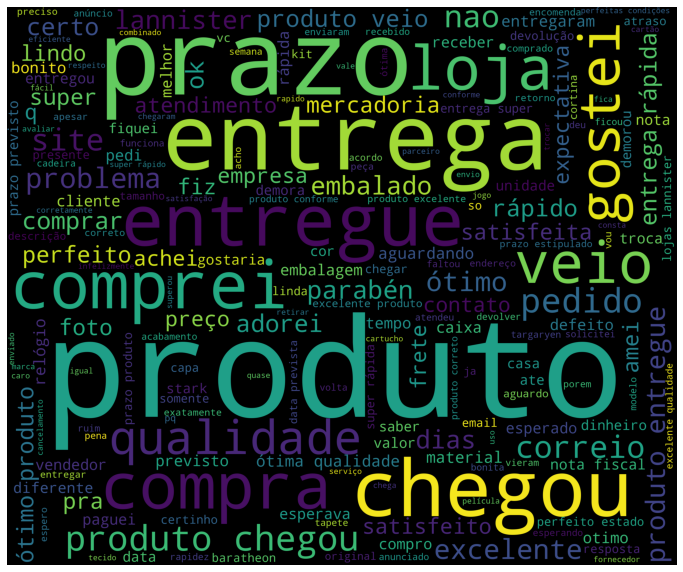

In [115]:
print('Positive_Comments')

plt.figure(1,figsize=(12,12))
plt.imshow(pos_wcloud)
plt.axis('off')
plt.show()

Negative_Comments


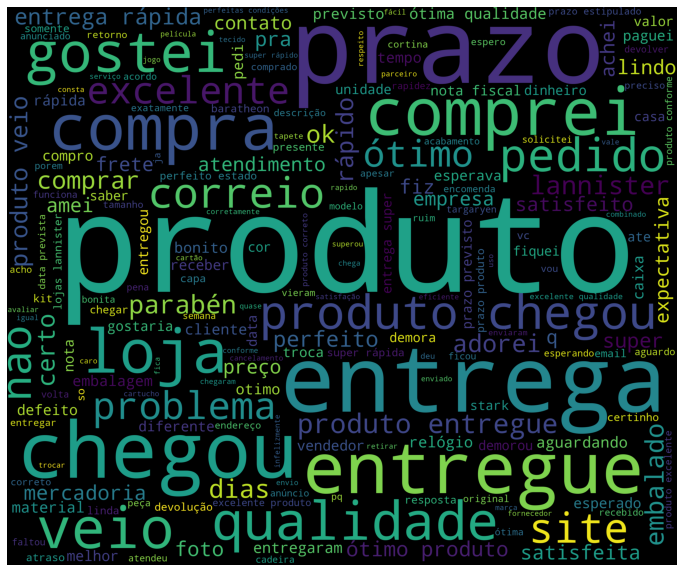

In [116]:
print('Negative_Comments')

plt.figure(1,figsize=(12,12))
plt.imshow(neg_wcloud)
plt.axis('off')
plt.show()